<a href="https://colab.research.google.com/github/F1ameX/Modern-Methods-of-Deep-Machine-Learning/blob/main/2_elementary_perceptron/2_elementary_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.typing import ArrayLike
from typing import Optional
from tqdm.notebook import tqdm

In [2]:
def make_circles(n_samples : int = 100,
                 shuffle : bool = True,
                 noise : float = None,
                 random_state : int = None,
                 factor : float = 0.8):

    rng = np.random.default_rng(seed = random_state)

    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out

    linspace_out = np.linspace(0, 2 * np.pi, n_samples_out, endpoint = False)
    linspace_in = np.linspace(0, 2 * np.pi, n_samples_in, endpoint = False)

    X1_out = np.cos(linspace_out)
    X2_out = np.sin(linspace_out)

    X1_in = np.cos(linspace_in) * factor
    X2_in = np.sin(linspace_in) * factor

    X = np.vstack(
        [np.append(X1_out, X1_in), np.append(X2_out, X2_in)]
    ).T

    y = np.hstack (
        [np.zeros(n_samples_out, dtype = int), np.ones(n_samples_in, dtype = int)]
    )

    if noise is not None:
        X += rng.normal(scale = noise, size = X.shape)

    if shuffle:
        permutation = rng.permutation(n_samples)
        X = X[permutation]
        y = y[permutation]

    return X, y


def make_xor(n_samples : int = 100,
             noise : float = 0.2,
             scale : float = 1.0,
             centers : ArrayLike | None = None,
             shuffle : bool = True,
             random_state : int = 42,
             return_centers : bool = False):

    rng = np.random.default_rng(seed = random_state)

    if centers is None:
        centers = np.array(
            [
                (scale, scale),
                (scale, -scale),
                (-scale, scale),
                (-scale, -scale),
             ],
            dtype = float
            )

    n_centers = centers.shape[0]

    base = n_samples // n_centers
    extra = n_samples % n_centers

    clusters = np.zeros(n_centers, dtype = int)

    for k in range(n_centers):
        if k < extra:
            clusters[k] = base + 1
        else:
            clusters[k] = base

    X = np.empty((n_samples, 2))
    y = np.empty(n_samples, dtype = int)

    pos = 0
    for k in range(n_centers):
        normal_matrix = rng.normal(loc = 0, scale = 1, size = (clusters[k], 2))
        X_k = centers[k] + noise * normal_matrix

        if k in [0, 3]:
            y[pos : pos + clusters[k]] = 0
        else:
            y[pos : pos + clusters[k]] = 1

        X[pos : pos + clusters[k]] = X_k
        pos += clusters[k]

    if shuffle:
        permutation = rng.permutation(n_samples)
        X = X[permutation]
        y = y[permutation]

    if return_centers:
        return X, y, centers
    return X, y


def make_blobs(n_samples : int = 100,
               n_features : int = 2,
               centers : int | ArrayLike | None = None,
               cluster_std : float | ArrayLike = 1.0,
               center_box : tuple[float, float] = (-1.0, 1.0),
               shuffle : bool = True,
               random_state : int = 42,
               return_centers : bool = False):

    rng = np.random.default_rng(seed = random_state)

    if centers is None:
        n_centers = 2

        centers = rng.uniform(
            center_box[0], center_box[1], size = (n_centers, n_features)
        )

    elif isinstance(centers, int):
        n_centers = centers
        centers = rng.uniform(
            center_box[0], center_box[1], size = (n_centers, n_features)
        )

    else:
        centers = np.asarray(centers, dtype = float)
        n_centers = centers.shape[0]

    base = n_samples // n_centers
    extra = n_samples % n_centers

    clusters = np.zeros(n_centers, dtype = int)

    for k in range(n_centers):
        if k < extra:
            clusters[k] = base + 1
        else:
            clusters[k] = base

    if isinstance(cluster_std, int | float):
        cluster_std_sigma = cluster_std
        cluster_std = np.repeat(cluster_std_sigma, n_centers)

    X = np.empty((n_samples, n_features))
    y = np.empty(n_samples, dtype = int)

    pos = 0

    for k in range(n_centers):
        normal_matrix = rng.normal(loc = 0, scale = 1, size = (clusters[k], n_features))
        X_k = centers[k] + cluster_std[k] * normal_matrix

        y[pos : pos + clusters[k]] = k
        X[pos : pos + clusters[k]] = X_k
        pos += clusters[k]

    if shuffle:
        permutation = rng.permutation(n_samples)
        X = X[permutation]
        y = y[permutation]

    if return_centers:
        return X, y, centers

    return X, y


def make_spiral(n_samples : int = 100,
                turns : int = 2,
                radius : float = 0.0,
                sweep : float = 0.15,
                shuffle : bool = True,
                noise : float = None,
                random_state : int = 42):

    rng = np.random.default_rng(seed = random_state)

    n_samples_out = n_samples // 2
    n_samples_in = n_samples - n_samples_out

    theta_out = np.linspace(0, turns * 2 * np.pi, n_samples_out, endpoint = False)
    theta_in = np.linspace(0, turns * 2 * np.pi, n_samples_in, endpoint = False)

    spiral_out = radius + sweep * theta_out
    spiral_in = radius + sweep * theta_in

    X1_out = spiral_out * np.cos(theta_out)
    X2_out = spiral_out * np.sin(theta_out)

    X1_in = spiral_in * np.cos(theta_in + np.pi)
    X2_in = spiral_in * np.sin(theta_in + np.pi)

    X = np.vstack(
        [np.append(X1_out, X1_in), np.append(X2_out, X2_in)]
    ).T

    y = np.hstack(
        [np.zeros(n_samples_out, dtype = int), np.ones(n_samples_in, dtype = int)]
    )

    if noise is not None:
        X += rng.normal(scale = noise, size = X.shape)

    if shuffle:
        permutation = rng.permutation(n_samples)
        X = X[permutation]
        y = y[permutation]

    return X, y

In [4]:
class Perceptron:
    def __init__(self, activation_function : str = 'step', fit_intercept : bool = True):

        assert activation_function in ['step', 'sigmoid']
        self.activation_function = activation_function
        self.fit_intercept = fit_intercept

        self.weights = None

    def _add_bias(self, X : np.ndarray) -> np.ndarray:
        if self.fit_intercept:
            return np.hstack([np.ones((X.shape[0], 1)), X])
        return X

    def decision_function(self, X : np.ndarray) -> np.ndarray:
        Xb = self._add_bias(X)
        return Xb @ self.weights

    def predict_proba(self, X : np.ndarray) -> np.ndarray:
        if self.activation_function != 'sigmoid':
            raise ValueError("predict_proba method available only for sigmoid function!")
        z = np.clip(self.decision_function(X), -50, 50)
        return 1 / (1 + np.exp(-z))

    def predict(self, X : np.ndarray) -> np.ndarray:
        if self.activation_function == 'step':
            return (self.decision_function(X) >= 0).astype(int)
        else:
            return (self.predict_proba(X) >= 0.5).astype(int)

    def fit(self, X: np.ndarray,
            y: np.ndarray,
            random_state : int = 42,
            learning_rate : float = 0.01,
            n_epochs : int = 100,
            ):

        X = np.asarray(X, dtype = float)
        y = np.asarray(y, dtype = int).ravel()

        rng = np.random.default_rng(seed = random_state)

        Xb = self._add_bias(X)
        n_features = Xb.shape[1]

        self.weights = np.zeros(n_features, dtype = float)

        if self.activation_function == 'step':
            Xb_base = Xb.copy()
            y_norm_base = 2 * y - 1

            for epoch in tqdm(
                range(n_epochs),
                desc = "Fitting perceptron",
                unit = "epoch",
                total = n_epochs,
                dynamic_ncols = True,
                leave = True,
                mininterval = 0.1):

                updates_epoch = 0

                permutation = rng.permutation(X.shape[0])
                Xb = Xb_base[permutation]
                y_norm = y_norm_base[permutation]

                for i in range(Xb.shape[0]):
                    if y_norm[i] * (Xb[i] @ self.weights) <= 0:
                        self.weights += learning_rate * y_norm[i] * Xb[i]
                        updates_epoch += 1

                if updates_epoch == 0:
                    break

        else:
            for epoch in tqdm(
                range(n_epochs),
                desc = "Fitting perceptron",
                unit = "epoch",
                total = n_epochs,
                dynamic_ncols = True,
                leave = True,
                mininterval = 0.1):

                z = np.clip(Xb @ self.weights, -50, 50)
                p = 1 / (1 + np.exp(-z))
                grad = (Xb.T @ (p - y)) / Xb.shape[0]
                self.weights -= learning_rate * grad

        return self

In [77]:
def confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray) -> np.array:
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()

    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    true_negative = np.sum((y_true == 0) & (y_pred == 0))
    false_positive = np.sum((y_true == 0) & (y_pred == 1))
    false_negative = np.sum((y_true == 1) & (y_pred == 0))

    return np.array([[true_negative, false_positive],
                     [false_negative, true_positive]], dtype=int)


def classification_report(y_true : np.ndarray, y_pred : np.ndarray):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()

    true_positive = np.sum((y_true == 1) & (y_pred == 1))
    true_negative = np.sum((y_true == 0) & (y_pred == 0))
    false_positive = np.sum((y_true == 0) & (y_pred == 1))
    false_negative = np.sum((y_true == 1) & (y_pred == 0))

    assert true_positive + false_positive > 0
    assert true_positive + false_negative > 0

    accuracy = (true_positive + true_negative) / y_true.shape[0]
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * precision * recall / (precision + recall)

    return {
        'Accuracy' : accuracy,
        'Precision' : precision,
        'Recall' : recall,
        'F1-score' : f1_score
        }



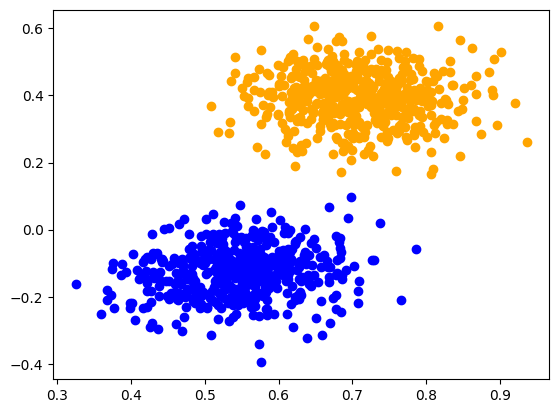

In [25]:
X, y = make_blobs(n_samples = 1000, cluster_std = 0.075)

X_neg = X[y == 0]
X_pos = X[y == 1]

plt.scatter(X_neg[:, 0], X_neg[:, 1], color = 'blue')
plt.scatter(X_pos[:, 0], X_pos[:, 1], color = 'orange')
plt.show()

In [79]:
elementary_perceptron = Perceptron(activation_function = 'sigmoid', fit_intercept = True)
elementary_perceptron.fit(X, y, random_state = 52, learning_rate = 0.003, n_epochs = 1000)

Fitting perceptron:   0%|          | 0/1000 [00:00<?, ?epoch/s]

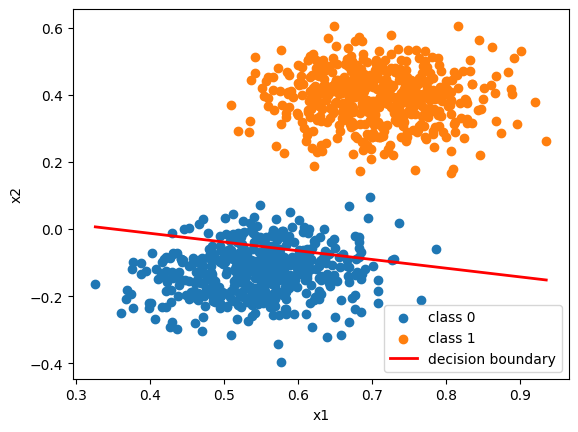

In [80]:
b, w1, w2 = elementary_perceptron.weights
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x1_line = np.array([x1_min, x1_max])
x2_line = -(w1 * x1_line + b) / w2

X0 = X[y == 0]
X1 = X[y == 1]
plt.scatter(X0[:, 0], X0[:, 1], label="class 0")
plt.scatter(X1[:, 0], X1[:, 1], label="class 1")

plt.plot(x1_line, x2_line, linewidth=2, label="decision boundary", color = 'red')

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

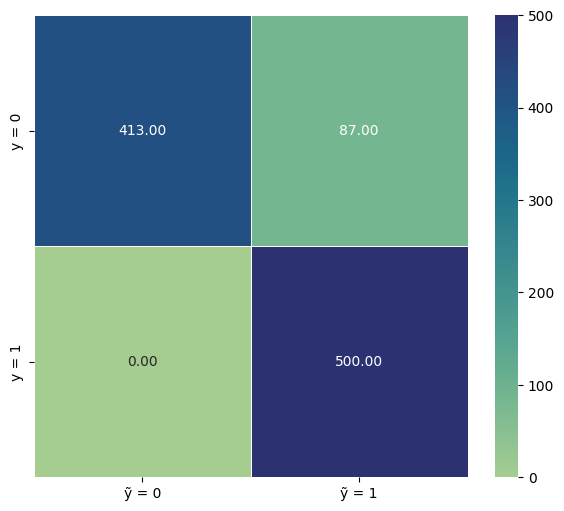

In [81]:
y_pred = elementary_perceptron.predict(X)

confusion_matrix_df = pd.DataFrame(confusion_matrix(y, y_pred),
                       index = ['y = 0', 'y = 1'],
                       columns = ['ỹ = 0', 'ỹ = 1'])
plt.figure(figsize = (7, 6))
sns.heatmap(confusion_matrix_df, annot=True, cmap='crest', fmt=".2f", linewidths=.5)
plt.show()

In [82]:
pd.DataFrame([classification_report(y, y_pred)], index = ['step'])

,Accuracy,Precision,Recall,F1-score
step,0.913,0.851789,1.0,0.919963
